In [121]:
#imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [122]:
#Machine Learning imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [123]:
#Load Test & Training Data Sets
train_DF = pd.read_csv("train.csv", dtype = {"Age": np.float64}, )
test_DF = pd.read_csv("test.csv", dtype = {"Age": np.float64}, )

In [124]:
#Visualizing Data (First n-rows)
train_DF.head(n = 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [125]:
print("------Training Data Information-------\n")
train_DF.info()
print("\n\n------Test Data Information-------\n")
test_DF.info()

------Training Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


------Test Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-n

In [126]:
#Dropping data irrelevant to analysis
train_DF = train_DF.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = False)
test_DF = test_DF.drop(['Name','Ticket'], axis = 1, inplace = False)

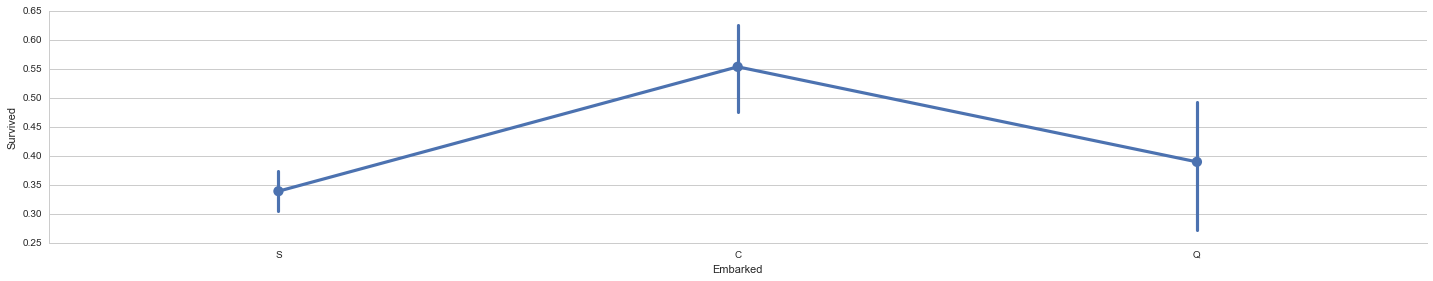

In [127]:
#Creating Dummy Plots based on 'Embarked'
train_DF['Embarked'] = train_DF['Embarked'].fillna('S')
sns.factorplot(x = 'Embarked', y = 'Survived', data=train_DF, size = 4, aspect = 5)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


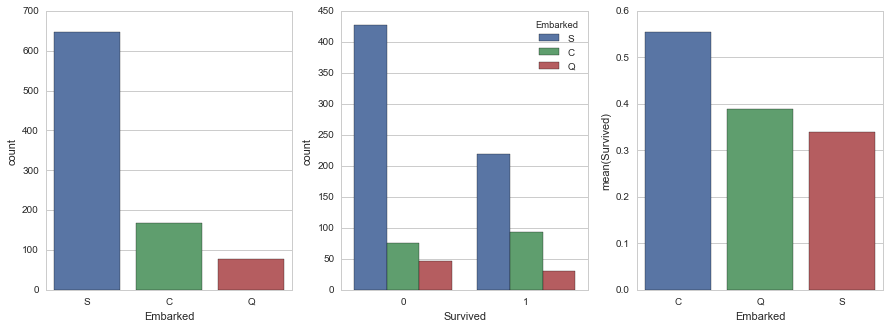

In [128]:
figure, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Embarked', data = train_DF, ax = ax1)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_DF, ax = ax2)
embark_perc = train_DF[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,ax=ax3)
embark_perc.head()

In [129]:
#Introducing dummies for Embarked
embark_dummy = pd.get_dummies(train_DF['Embarked'])
train_DF = train_DF.join(embark_dummy) #May or may not choose to drop 'S' here (Due to lower chances of survival)
embark_dummy_test = pd.get_dummies(test_DF['Embarked'])
test_DF = test_DF.join(embark_dummy_test)

train_DF.drop(['Embarked'], axis = 1, inplace = True)
test_DF.drop(['Embarked'], axis = 1, inplace = True)
train_DF['C'] = train_DF['C'].astype(int)
train_DF['Q'] = train_DF['Q'].astype(int)
train_DF['S'] = train_DF['S'].astype(int)
train_DF['C'] = train_DF['C'].astype(int)
train_DF['Q'] = train_DF['Q'].astype(int)
train_DF['S'] = train_DF['S'].astype(int)
train_DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


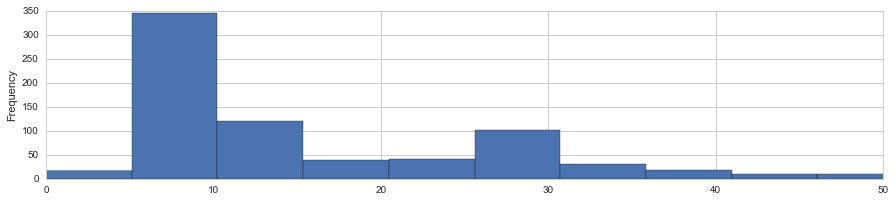

In [130]:
#Feature: Fare 
""" Since fare is one such obvious feature it is 
safe to say to include in the feature without much
thought """
#Perform Cleanup
test_DF['Fare'].fillna(test_DF['Fare'].median(), inplace = True)
train_DF['Fare'] = train_DF['Fare'].astype(int)
test_DF['Fare'] = test_DF['Fare'].astype(int)
#Fetch Fare Information
survived_fare = train_DF['Fare'][train_DF['Survived'] == 1]
not_survived_fare = train_DF['Fare'][train_DF['Survived'] == 0]
#Extract Metrics
get_avg_fare = DataFrame([survived_fare.mean(), not_survived_fare.mean()])
get_std_fare = DataFrame([survived_fare.std(), not_survived_fare.std()])
#Plot
train_DF['Fare'].plot(kind = 'hist', figsize = (15,3), bins = 100, xlim = (0,50))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


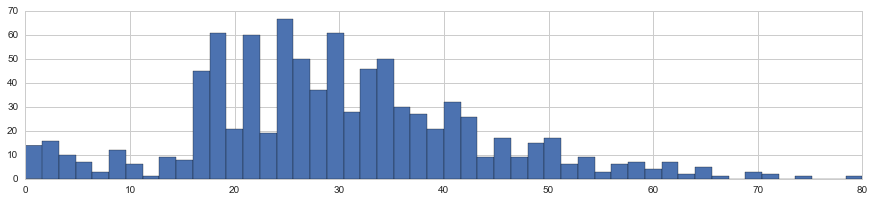

In [131]:
#Feature Induction: Age
avg_age_train = train_DF['Age'].mean()
std_age_train = train_DF['Age'].std()
avg_age_test = test_DF["Age"].mean()
std_age_test = test_DF["Age"].std()

#Count NAN Age Values & then fill them up with Random Values
count_nan_train = train_DF['Age'].isnull().sum()
count_nan_test = test_DF['Age'].isnull().sum()
rand1 = np.random.randint(avg_age_train - std_age_train, avg_age_train + std_age_train, size = count_nan_train)
rand2 = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, size = count_nan_test)

train_DF['Age'][np.isnan(train_DF['Age'])] = rand1
test_DF["Age"][np.isnan(test_DF["Age"])] = rand2

train_DF['Age'] = train_DF['Age'].astype(int)
test_DF['Age'] = test_DF['Age'].astype(int)

train_DF['Age'].hist(bins = 50, figsize = (15,3))

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


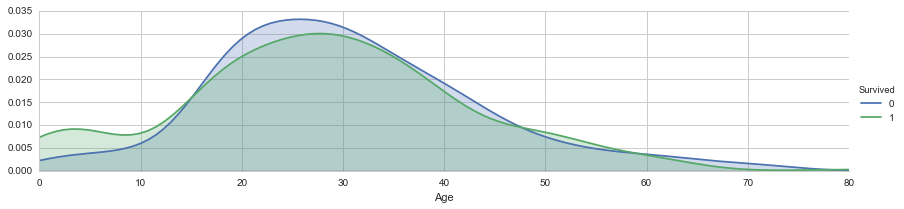

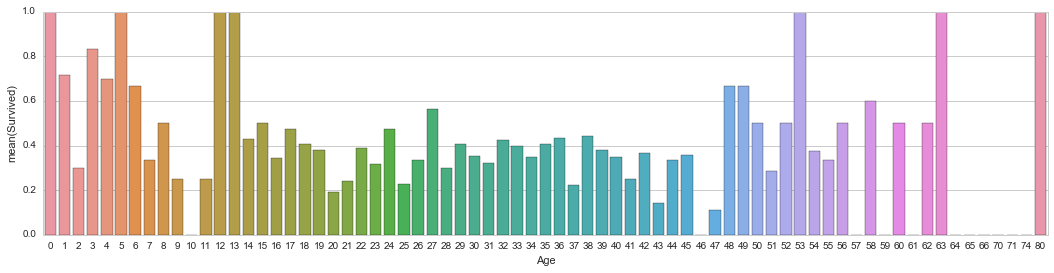

In [132]:
facet = sns.FacetGrid(train_DF, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_DF['Age'].max()))
facet.add_legend()
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_DF[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [133]:
train_DF.drop("Cabin", axis = 1, inplace = True)
test_DF.drop("Cabin", axis = 1, inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0x1219be588>, <matplotlib.text.Text at 0x1250b3da0>]

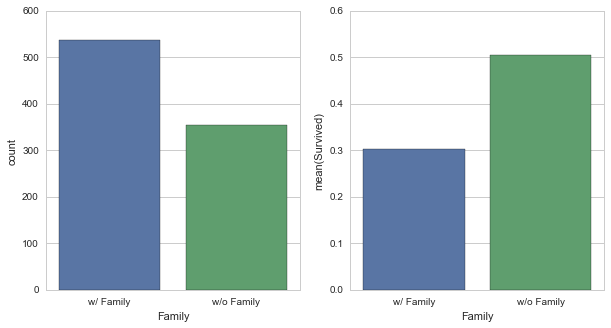

In [134]:
#Family i.e Parch + Siblings
train_DF['Family'] =  train_DF["Parch"] + train_DF["SibSp"]
train_DF['Family'].loc[train_DF['Family'] > 0] = 1
train_DF['Family'].loc[train_DF['Family'] == 0] = 0
test_DF['Family'] =  test_DF["Parch"] + test_DF["SibSp"]
test_DF['Family'].loc[test_DF['Family'] > 0] = 1
test_DF['Family'].loc[test_DF['Family'] == 0] = 0


train_DF.drop(["Parch", "SibSp"], axis = 1, inplace = True)
test_DF.drop(["Parch", "SibSp"], axis = 1, inplace = True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Family', data = train_DF, ax = ax1)
ax1.set_xticklabels(['w/ Family','w/o Family'], rotation =0)

family_survival = train_DF[['Family', 'Survived']].groupby(['Family'], as_index = 0).mean()
sns.barplot(x = 'Family', y = 'Survived', data = family_survival, ax = ax2)
ax2.set_xticklabels(['w/ Family','w/o Family'], rotation =0)

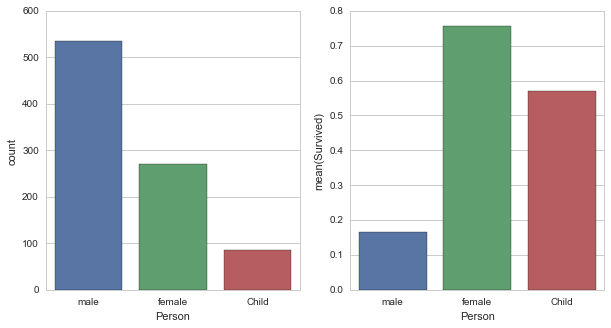

In [135]:
#Sex
#Referred from peer solutions -- Classify into Child, Male & Female (Just generic thinking)

def get_type(passenger):
    age, sex = passenger
    return 'Child' if age < 16 else sex
train_DF['Person'] = train_DF[['Age', 'Sex']].apply(get_type, axis = 1)
test_DF['Person'] = test_DF[['Age', 'Sex']].apply(get_type, axis = 1)

train_DF.drop(['Sex'], axis = 1, inplace = True)
test_DF.drop(['Sex'], axis = 1, inplace = True)

person_dummies_train = pd.get_dummies(train_DF['Person'])
person_dummies_train.columns = ['Child', 'Female', 'Male']

person_dummies_test = pd.get_dummies(test_DF['Person'])
person_dummies_test.columns = ['Child', 'Female', 'Male']

train_DF = train_DF.join(person_dummies_train)
test_DF = test_DF.join(person_dummies_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Person', data = train_DF, ax = ax1)

person_survival = train_DF[['Person', 'Survived']].groupby(['Person'], as_index = False).mean()
sns.barplot(x= 'Person', y = 'Survived', data = person_survival, ax = ax2, order=['male','female','Child'])

train_DF.drop(['Person'], axis = 1, inplace = True)
test_DF.drop(['Person'], axis = 1, inplace = True)

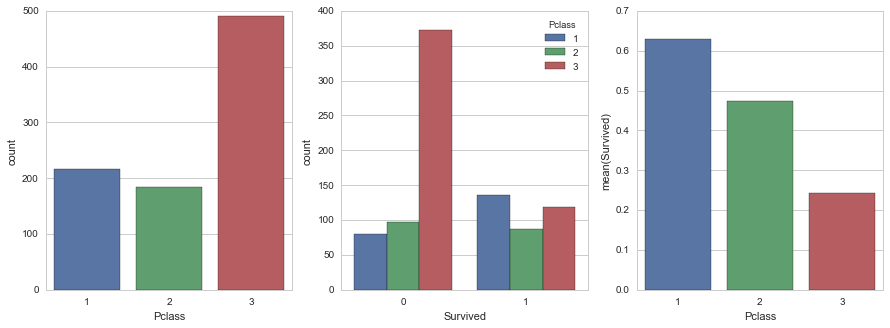

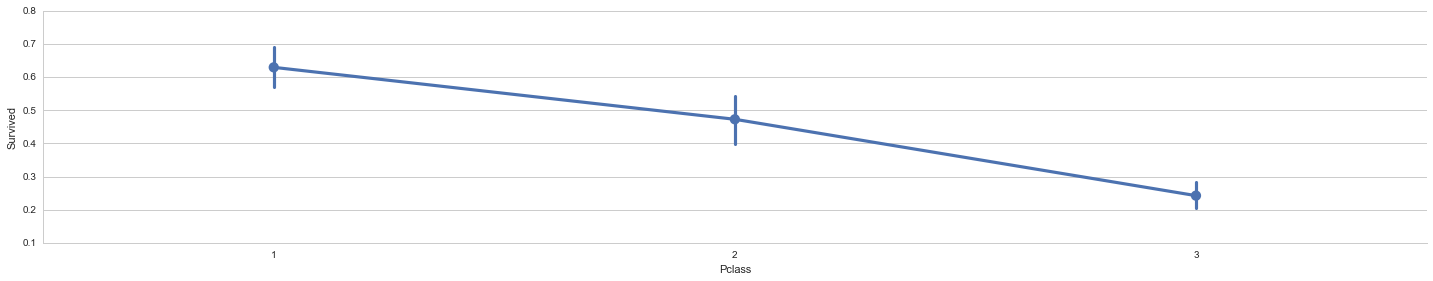

In [136]:
#PClass -- Very similar to 'Embarked'
figure, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.factorplot(x = 'Pclass', y = 'Survived', order = [1,2,3], data = train_DF, size = 4, aspect = 5)
sns.countplot(x = 'Pclass', data = train_DF, ax = ax1)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_DF, ax = ax2)
pclass_perc = train_DF[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x = 'Pclass', y = 'Survived', data = pclass_perc, ax = ax3)

#Dummies:
pclass_dummies_train = pd.get_dummies(train_DF['Pclass'])
pclass_dummies_train.columns = ['First Class', 'Second Class', 'Third Class']
pclass_dummies_test = pd.get_dummies(test_DF['Pclass'])
pclass_dummies_test.columns = ['First Class', 'Second Class', 'Third Class']

train_DF.drop(['Pclass'], axis = 1, inplace = True)
test_DF.drop(['Pclass'], axis = 1, inplace = True)

train_DF = train_DF.join(pclass_dummies_train)
test_DF = test_DF.join(pclass_dummies_test)


In [139]:
#MACHINE LEARING & TESTING

X = train_DF.drop('Survived', axis = 1)
Y = train_DF['Survived']
X_test = test_DF.drop('PassengerId', axis = 1).copy()

In [140]:
#Using Logistic Regression 

logr = LogisticRegression()
logr.fit(X,Y)
Y_test = logr.predict(X_test)
logr.score(X,Y)

0.80695847362514028

In [ ]:
#Using RandomForests
rf = new RandomForestClassifier(n_estimators=100)
rf.fit(X,Y)
Y_test = rf.predict(X_test)